<a href="https://colab.research.google.com/github/JimilPatel13/Deep_Learning_Projects/blob/main/Handdigit_Classification_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name : Patel Jimil Mitesh
# Data Science (Semester-7)

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
# Define a simple neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 20)
        self.fc2 = nn.Linear(20, 15)
        self.fc3 = nn.Linear(15, 10)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [3]:
# Load the MNIST dataset and apply transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

In [4]:
# Initialize the network, loss function, and optimizer
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [5]:
# Training the network
for epoch in range(80):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs = inputs.view(-1, 28*28)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}')

print('Finished Training')

Epoch 1, Loss: 0.5577106634656588
Epoch 2, Loss: 0.3159780534307162
Epoch 3, Loss: 0.27425314491391184
Epoch 4, Loss: 0.24486366696258385
Epoch 5, Loss: 0.22433924594819546
Epoch 6, Loss: 0.20849631704638402
Epoch 7, Loss: 0.198556771487991
Epoch 8, Loss: 0.19125401141519346
Epoch 9, Loss: 0.18323506053686142
Epoch 10, Loss: 0.17931433272659777
Epoch 11, Loss: 0.17505059809908272
Epoch 12, Loss: 0.17225538726175824
Epoch 13, Loss: 0.1660046057427923
Epoch 14, Loss: 0.16453886153673133
Epoch 15, Loss: 0.16204204402317604
Epoch 16, Loss: 0.15937993428160746
Epoch 17, Loss: 0.15560733246803285
Epoch 18, Loss: 0.15525154704277713
Epoch 19, Loss: 0.15241459354323644
Epoch 20, Loss: 0.15092403176948427
Epoch 21, Loss: 0.1513255290562908
Epoch 22, Loss: 0.14902893641007442
Epoch 23, Loss: 0.1472610722961525
Epoch 24, Loss: 0.14673682654524842
Epoch 25, Loss: 0.14514456261868278
Epoch 26, Loss: 0.14354055116772652
Epoch 27, Loss: 0.1439093405748407
Epoch 28, Loss: 0.14104594221189617
Epoch 29,

In [6]:
correct = 0
total = 0
y_pred = []

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.view(-1, 28*28)
        outputs = net(images)
        predicted = torch.max(outputs.data, 1)[1]  # Extract the tensor indices
        y_pred.extend(predicted)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct / total:.2f}%')

Accuracy of the network on the test images: 95.04%


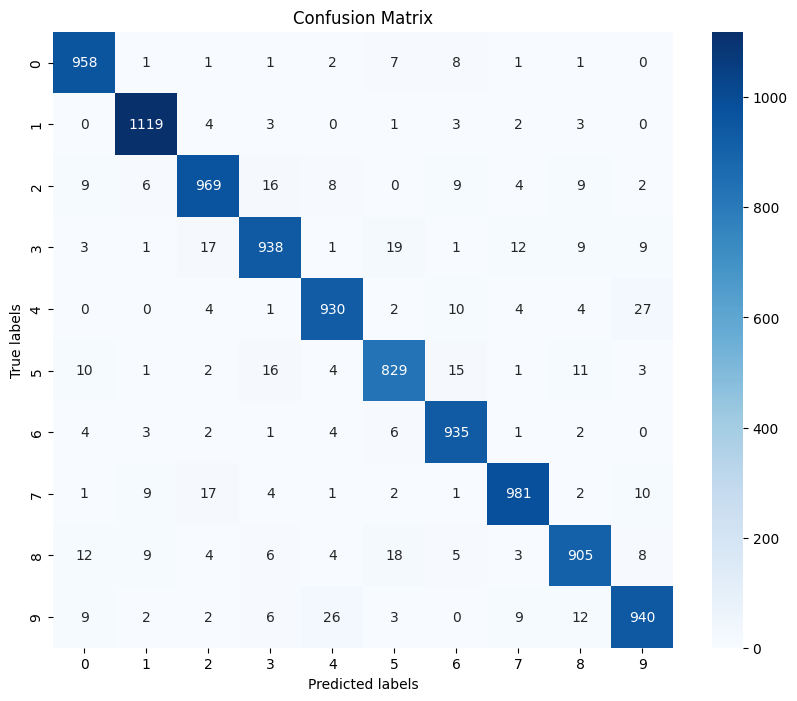

In [7]:
# Creating and plotting the confusion matrix
conf_matrix = confusion_matrix(testset.targets, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()